Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)

 * 2023/11/06 - updated
 * 2023/09/21 - updated
 * 2022/06/28 - updated
 * 2021/12/13 - initial revision

<img align="left" width="50%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" >

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

### Corrections to do on the file itself OAICC_20231101.csv
 * 'The Kingdom of Saudi Arabia' --> 'Kingdom of Saudi Arabia'

In [2]:
df = pd.read_csv("https://oa-icc.ipsl.fr/checking/OAICC_20231101.csv")
df

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year
0,"Adeleke, B., Robertson-Andersson, D., & Moodle...",doi:10.1016/j.heliyon.2020.e04744,NaN,Not included,< 2 carbonate chemistry parameters,South Africa,2020
1,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016
2,"Ahrendt, S., Mobberley, J., Visscher, P., Koss...",doi:10.3390/min4010145,NaN,Not included,< 2 carbonate chemistry parameters,USA,2014
3,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018
4,"Al-Awlaqi, N. A. N., Shazili, N. A. M., & Yuso...",doi:10.17576/mjas-2019-2306-10,NaN,Not included,< 2 carbonate chemistry parameters,Malaysia,2019
...,...,...,...,...,...,...,...
3660,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013
3661,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014
3662,"Zlatkin, R. L., & Heuer, R. M., 2019. Ocean ac...",doi:10.1098/rsos.191041,10.1594/PANGAEA.912287,Included,NaN,USA,2019
3663,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002


In [3]:
df['Included/Not included'].unique()

array(['Not included', 'Included'], dtype=object)

In [4]:
df[df['Included/Not included'] == 'Included'][0:100]

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year
2111,"Ab Lah, R., Kelaher, B. P., Bucher, D., & Benk...",doi:10.1016/j.marenvres.2018.08.009,10.1594/PANGAEA.902088,Included,NaN,Malaysia,2018
2112,"Abarca-Ortega, A., Muñoz-Moya, E., Pacheco Ala...",doi:10.3389/fbioe.2021.813537,10.1594/PANGAEA.945534,Included,NaN,Chile,2022
2113,"Aberle, N., Schulz, K. G., Stuhr, A., Malzahn,...",doi:10.5194/bg-10-1471-2013,10.1594/PANGAEA.832403,Included,NaN,EU-Germany,2013
2114,"Agostini, S., Fujimura, H., Higuchi, T., Yuyam...",doi:10.1016/j.crvi.2013.07.003,10.1594/PANGAEA.835319,Included,NaN,Japan,2013
2115,"Agostini, S., Harvey, B. P., Milazzo, M., Wada...",doi:10.1111/gcb.15749,10.1594/PANGAEA.944056,Included,NaN,Japan,2021
...,...,...,...,...,...,...,...
2206,"Bergstrom, E., Silva, J., Martins, C., & Horta...",doi:10.1038/s41598-018-35670-3,10.1594/PANGAEA.914662,Included,NaN,Australia,2019
2207,"Bermúdez, R., Winder, M., Stuhr, A., Almén, A....",doi:10.5194/bg-13-6625-2016-supplement,10.1594/PANGAEA.873653,Included,NaN,EU-Germany,2016
2208,"Bernhard, J. M., Wit, J. C., Starczak, V. R., ...",doi:10.3389/fmars.2021.643339,10.1594/PANGAEA.932793,Included,NaN,USA,2021
2209,"Bi, R., Ismar, S., Sommer, U., & Zhao, M., 201...",doi:10.1002/lno.10429,10.1594/PANGAEA.883475,Included,NaN,China,2017


In [5]:
a = df[df['Included/Not included'] == 'Included'].groupby("Country/Region").size()
a.sort_values(inplace=True, ascending=False)
b = a[a >= 5]
b

Country/Region
USA                        327
EU-Germany                 243
Australia                  148
China                      148
EU-UK                      122
EU-France                   74
EU-Spain                    48
Japan                       47
EU-Portugal                 45
Canada                      40
EU-Norway                   32
EU-Sweden                   31
EU-Italy                    30
New Zealand                 22
Chile                       21
EU-Monaco                   19
EU-Belgium                  19
EU-The Netherlands          16
Israel                      12
China, Hong Kong            11
Republic of Korea           10
EU-Greece                    9
Brazil                       9
India                        7
EU-Finland                   6
China, Taiwan                6
Kingdom of Saudi Arabia      6
EU-UK (Bermuda)              6
dtype: int64

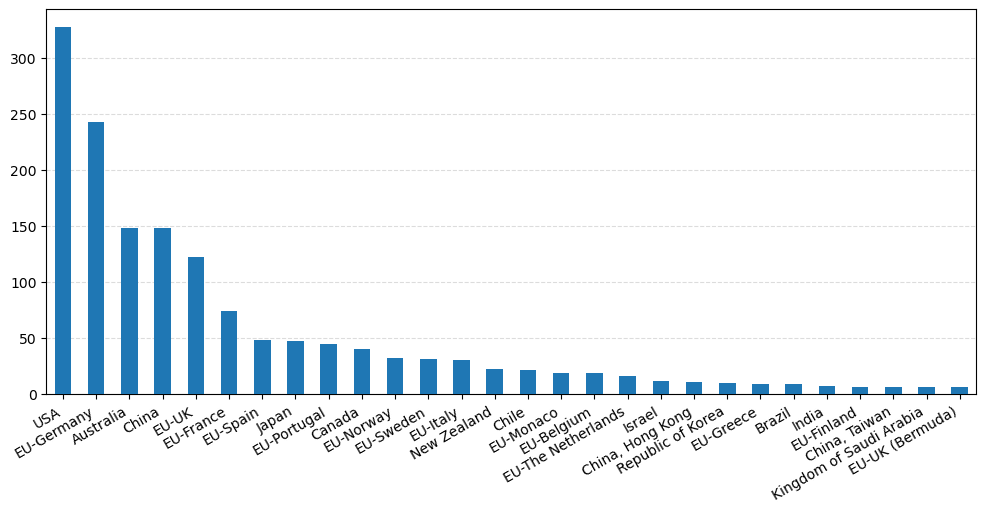

In [6]:
ax = b.plot.bar(zorder=3, figsize=[12,5], width=0.5, xlabel="")
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [7]:
x = "EU-France (New Caledonia)"
x = "China, xxxx"
x = "USA, Guam"
re.split('-|,|\(', x)[1].strip()

'Guam'

In [8]:
# Country/Region 2
# EU-xxxx as EU
# China, xxxx as China
# USA, xxxx as USA
df['Country/Region 2'] = df['Country/Region'].apply(lambda x: re.split('-|,', x)[0].strip())

# Country/Region 3
# EU-xxxx (yyyy) as xxxx
# EU-UK (Bermuda) as UK
# EU-France (New Caledonia) as France
# China, xxxx as xxxx
# USA, xxxx as xxxx
df['Country/Region 3'] = df['Country/Region'].apply(lambda x: re.split('-|,|\(', x)[1].strip() if str(x).startswith(("EU-", "China,", "USA,")) else x)

df

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3
0,"Adeleke, B., Robertson-Andersson, D., & Moodle...",doi:10.1016/j.heliyon.2020.e04744,NaN,Not included,< 2 carbonate chemistry parameters,South Africa,2020,South Africa,South Africa
1,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016,EU,Austria
2,"Ahrendt, S., Mobberley, J., Visscher, P., Koss...",doi:10.3390/min4010145,NaN,Not included,< 2 carbonate chemistry parameters,USA,2014,USA,USA
3,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018,EU,Portugal
4,"Al-Awlaqi, N. A. N., Shazili, N. A. M., & Yuso...",doi:10.17576/mjas-2019-2306-10,NaN,Not included,< 2 carbonate chemistry parameters,Malaysia,2019,Malaysia,Malaysia
...,...,...,...,...,...,...,...,...,...
3660,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013,EU,Germany
3661,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014,EU,Spain
3662,"Zlatkin, R. L., & Heuer, R. M., 2019. Ocean ac...",doi:10.1098/rsos.191041,10.1594/PANGAEA.912287,Included,NaN,USA,2019,USA,USA
3663,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002,EU,Germany


In [9]:
df[df['Country/Region'].isna()]

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3


In [10]:
len(df)

3665

In [11]:
df[df['Country/Region'].str.startswith("China,")]

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3
73,"Chan, B. K., Wang, T. W., Chen, P. C., Lin, C....",doi:10.1371/journal.pone.0148675,NaN,Not included,< 2 carbonate chemistry parameters,"China, Taiwan",2016,China,Taiwan
222,"Kang, J., Nagelkerken, I., Rummer, J. L., Rodo...",doi:10.1111/gcb.16119,NaN,Not included,< 2 carbonate chemistry parameters,"China, Hong Kong",2022,China,Hong Kong
255,"Lee, M. C., Libatique, M. J. H., Yeh, H. Y., &...",doi:10.1007/s00128-022-03498-3,NaN,Not included,< 2 carbonate chemistry parameters,"China, Taiwan",2022,China,Taiwan
824,"Dang, X., Lim, Y. K., Li, Y., Roberts, S. B., ...",doi:10.1111/mec.16751,NaN,Not included,No answer from authors,"China, Hong Kong",2023,China,Hong Kong
1152,"Hsieh, H.-H., Weerathunga, V., Weerakkody, W. ...",doi:10.1038/s41598-021-00612-z,NaN,Not included,No answer from authors,"China, Taiwan",2021,China,Taiwan
1158,"Hu, M. Y., Guh, Y.-J., Stumpp, M., Lee, J.-R.,...",doi:10.1186/s12983-014-0055-z,NaN,Not included,No answer from authors,"China, Taiwan",2014,China,Taiwan
1159,"Hu, M. Y., Lee, J. R., Lin, L. Y., Shih, T. H....",doi:10.1186/1742-9994-10-51,NaN,Not included,No answer from authors,"China, Taiwan",2013,China,Taiwan
1312,"Lane, A. C., Mukherjee, J., Chan, V. B. S., & ...",doi:10.1007/s00227-012-2056-9,NaN,Not included,No answer from authors,"China, Hong Kong",2013,China,Hong Kong
1388,"Liu, P.-J., Ang, S.-J., Mayfield, A. B., & Lin...",doi:10.1016/j.scitotenv.2019.134464,NaN,Not included,No answer from authors,"China, Taiwan",2020,China,Taiwan
1395,"Lo, H. K. A., Chua, V. A., & Chan, K. Y. K., 2...",doi:10.1016/j.scitotenv.2021.149709,NaN,Not included,No answer from authors,"China, Hong Kong",2021,China,Hong Kong


In [12]:
df[df['Country/Region'].str.startswith("USA,")]

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3
640,"Bell, T., Manullang, C., Kumagai, N. H., Sakai...",doi:10.3755/galaxea.g2020_s2o,NaN,Not included,No answer from authors,"USA, Guam",2022,USA,Guam
641,"Bell, T., Manullang, C., Sakai, K., Suzuki, A....",doi:10.3755/galaxea.g2020_s1n,NaN,Not included,No answer from authors,"USA, Guam",2021,USA,Guam


In [13]:
# contains '-' of ','
df[df['Country/Region'].str.contains(",|-")]

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3
1,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016,EU,Austria
3,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018,EU,Portugal
5,"Al-Janabi, B., Kruse, I., Graiff, A., Winde, V...",doi:10.1371/journal.pone.0152948,NaN,Not included,< 2 carbonate chemistry parameters,EU-Germany,2016,EU,Germany
6,"Alenius, B., & Munguia, P., 2012. Effects of p...",doi:10.1080/10236244.2012.727235,NaN,Not included,< 2 carbonate chemistry parameters,EU-Sweden,2012,EU,Sweden
8,"Allison, N., Cole, C., Hintz, C., Hintz, K., &...",doi:10.1016/j.palaeo.2018.06.015,NaN,Not included,< 2 carbonate chemistry parameters,EU-UK,2018,EU,UK
...,...,...,...,...,...,...,...,...,...
3659,"Zittier, Z. M. C., Bock, C., Lannig, G., & Pör...",doi:10.1016/j.jembe.2015.08.001,10.1594/PANGAEA.867517,Included,NaN,EU-Germany,2015,EU,Germany
3660,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013,EU,Germany
3661,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014,EU,Spain
3663,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002,EU,Germany


In [14]:
a = df[df['Included/Not included'] == 'Included'].groupby("Country/Region 2").size()
a.sort_values(inplace=True, ascending=False)
b = a[a >= 5]
b

Country/Region 2
EU                         717
USA                        327
China                      165
Australia                  148
Japan                       47
Canada                      40
New Zealand                 22
Chile                       21
Israel                      12
Republic of Korea           10
Brazil                       9
India                        7
Kingdom of Saudi Arabia      6
dtype: int64

In [15]:
b.rename(index={'EU': 'European countries'}, inplace=True)

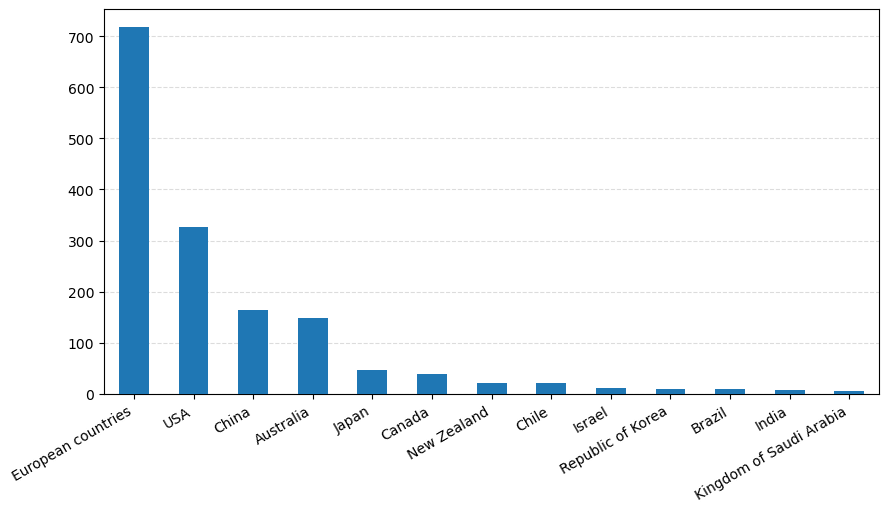

In [16]:
ax = b.plot.bar(zorder=3, figsize=[10,5], width=0.5, xlabel="")
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [18]:
a = df[(df['Country/Region'].str.startswith("EU-")) & (df['Included/Not included'] == 'Included')].groupby("Country/Region 3").size()
a.sort_values(inplace=True, ascending=False)
b = a[a >= 5]

b.rename(index={'UK': 'United Kingdom'}, inplace=True)
b

Country/Region 3
Germany            243
United Kingdom     128
France              76
Spain               48
Portugal            45
Norway              32
Sweden              31
Italy               30
Belgium             19
Monaco              19
The Netherlands     16
Greece               9
Finland              6
dtype: int64

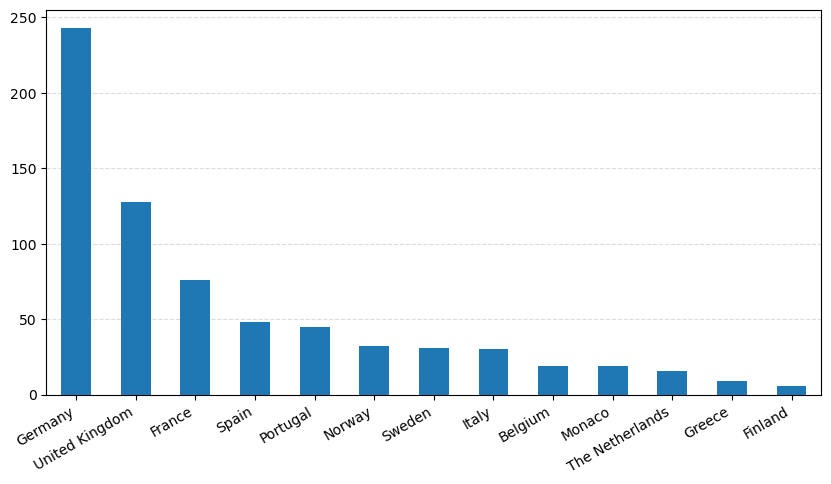

In [19]:
ax = b.plot.bar(zorder=3, figsize=[10,5], width=0.5, xlabel="")
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [28]:
# pycountry provides ISO 3166 codes
import pycountry
pycountry.countries.get(name='Taiwan, Province of China').alpha_3
pycountry.countries.get(name='Bermuda').alpha_3
pycountry.countries.get(name='Bahamas').alpha_3

'BHS'